# Salary Project

In [12]:
import pandas as pd
import numpy as np

In [13]:
#importing the csv dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [16]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [17]:
df.sample()  #taking a sample record for reference

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
75,AsstProf,B,8,3,Male,73266


In [18]:
df.isnull().sum()    #finding the total number of null values present in each field

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# Explorartory Data Analisys
ScatterPlot  

Visualizing data to understand Distribution of data in columns

In [19]:
import seaborn as sns   #importing seaborn library as sns
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

<AxesSubplot:xlabel='rank', ylabel='salary'>

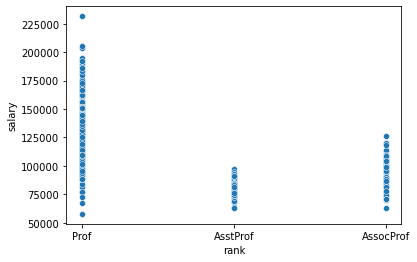

In [20]:
sns.scatterplot(x="rank",y="salary", data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

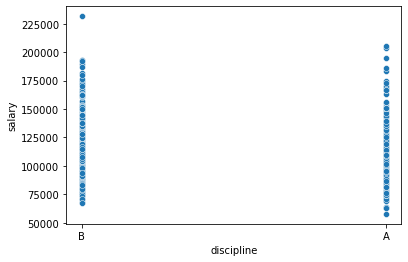

In [21]:
sns.scatterplot(x="discipline",y="salary", data=df)

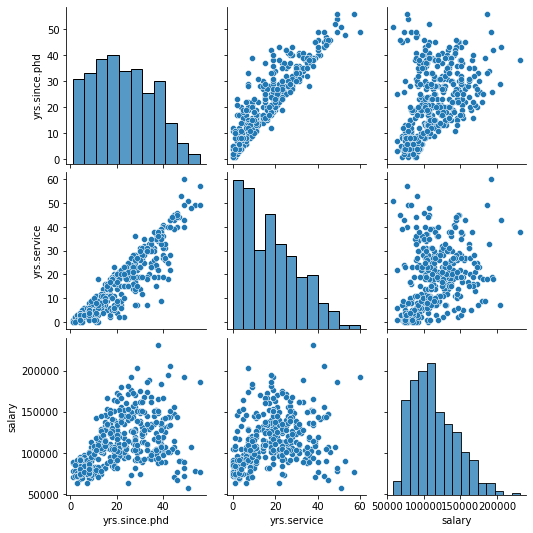

In [23]:
#for easy analysis we use pair plot to display all combinatios of plots in a single go
sns.pairplot(df)

Rank, Discipline, Sex is categorical data hence not fetched by the graph

# Correlation:

In [24]:
#Finding the correlation between the columns
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [25]:
df.corr()["salary"].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

Visualizing correlation using heatmap

<AxesSubplot:>

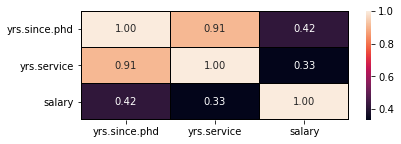

In [26]:
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(6,2))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='black',fmt='.2f')

Outcome of coreleation heatmap

    All the columns of the datasets is positively correlated with the target column i.e salary.
        yrs.since.phd have 42% correlation with salary
        yrs.service have 33% correlation with salary

# Descreptive Statistics

Describing DataSets:

In [27]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [28]:
#first quartile - min
print("diff 1 = ",91000.000000 - 57800.000000)
#second quartile - first quartile
print("diff 2 = ",107300.000000-91000.000000)
#third quartile - second quartile
print("diff 3 = ",134185.000000-107300.000000)
#max - third quartile
print("diff 4 = ",231545.000000-134185.000000)

diff 1 =  33200.0
diff 2 =  16300.0
diff 3 =  26885.0
diff 4 =  97360.0


Here the values are distinct, hence can be concluded that the data is not equally distributed

Text(0.5, 1.0, 'Variables summary')

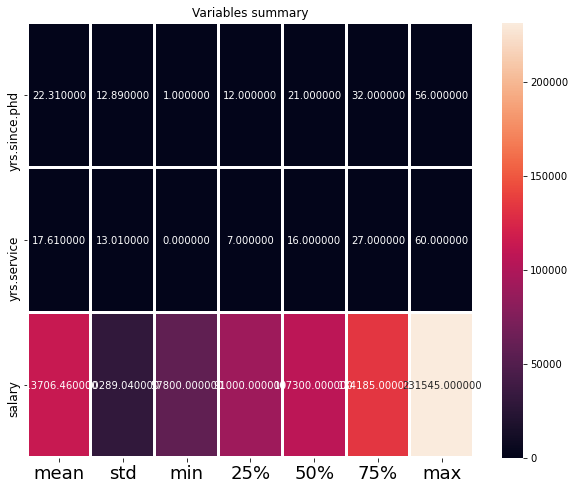

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)  #name of x axis to be displayed in fontsize of 18
plt.yticks(fontsize=12)
plt.title("Variables summary")

In [30]:
df.info()  #gives info on dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Outliners Checking

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

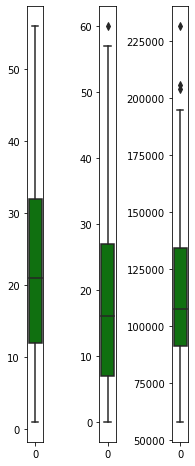

In [33]:
#As the data have categorical data, droping those columns for now
df_ints = df.drop(['rank','discipline','sex'], axis=1)


collist=df_ints.columns.values    #column names into collist
ncol=30                           #no of columns 30
nrows=14                          #no of columns 14
plt.figure(figsize=(ncol,3*ncol))

for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = df[collist[i]],color='green',orient='v') #v represents the vertical orientation
    plt.tight_layout()

Outliers are present in to fields

# Skewness

In [34]:
#Normal distribution has skewness = 0
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

Skewness is present here in all fields

Hence skewness is present we need to remove it to make the data normally distributed

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

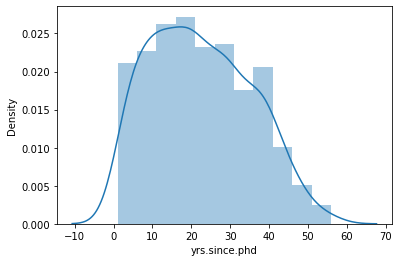

In [35]:
#Normal Distribution Curve
#taking Normal distribution cure to confirm if the data is normally distributed or not

sns.distplot(df['yrs.since.phd'])

The data of the column is not normalised. The building blocks is out of the normalised curve

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

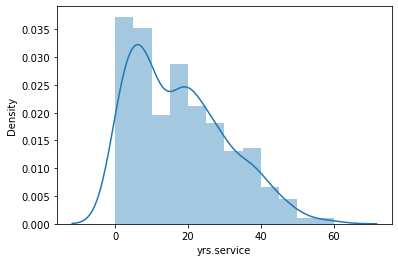

In [36]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

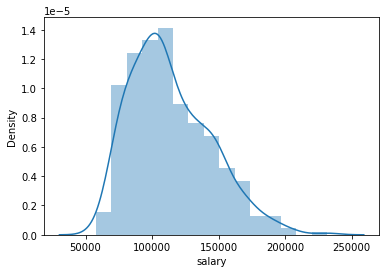

In [37]:
sns.distplot(df['salary'])

We initiate data cleansing technique to normalise the data as ML models performs well when the data is normalised

Here we preprocess the data and get the data ready to pass it through ML algorithm

In [38]:
df.corr()['salary']

yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

Removing Outliers:

1.IQR proximity rule

#in this we donot drop the outlier we just reassign the values of outliers

2.Z-Score Technique:

#in zscore we drop the outliers

In [39]:
from scipy.stats import zscore

In [40]:
zscore(df_ints)

array([[-0.25754973,  0.02966908,  0.86091884],
       [-0.17985426, -0.12429986,  1.96667226],
       [-1.42298184, -1.12509795, -1.12249537],
       ...,
       [ 1.52944617,  0.56856036, -0.39564018],
       [ 0.20862311, -0.20128433, -0.60750187],
       [-1.11219995, -1.04811348, -1.08001725]])

In [41]:
import numpy as np
z=np.abs(zscore(df_ints))
z.shape

(397, 3)

In [42]:
zscore(df_ints)

array([[-0.25754973,  0.02966908,  0.86091884],
       [-0.17985426, -0.12429986,  1.96667226],
       [-1.42298184, -1.12509795, -1.12249537],
       ...,
       [ 1.52944617,  0.56856036, -0.39564018],
       [ 0.20862311, -0.20128433, -0.60750187],
       [-1.11219995, -1.04811348, -1.08001725]])

In [43]:
np.abs(zscore(df_ints))<0

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [44]:
(np.abs(zscore(df_ints))<0).sum()

0

In [45]:
z

array([[0.25754973, 0.02966908, 0.86091884],
       [0.17985426, 0.12429986, 1.96667226],
       [1.42298184, 1.12509795, 1.12249537],
       ...,
       [1.52944617, 0.56856036, 0.39564018],
       [0.20862311, 0.20128433, 0.60750187],
       [1.11219995, 1.04811348, 1.08001725]])

In [46]:
#taking threshold as 3
#and finding which postitions have outliers
print(np.where(z>2))

(array([  6,   7,  43,  71,  77, 125, 125, 131, 131, 161, 169, 190, 194,
       198, 249, 261, 268, 271, 276, 276, 279, 282, 282, 285, 285, 290,
       292, 298, 304, 317, 330, 330, 330, 350, 350, 350, 356, 364, 383,
       389], dtype=int64), array([2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0,
       1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2], dtype=int64))


In [47]:
df_ints.iloc[261]

yrs.since.phd        45
yrs.service          45
salary           107550
Name: 261, dtype: int64

In [48]:
#calculation total num of outliers
len(np.where(z>2)[0])

40

In [49]:
#dropping the rows with outliers
df_ints.drop([  6,   7,  43,  71,  77, 125, 125, 131, 131, 161, 169, 190, 194,
       198, 249, 261, 268, 271, 276, 276, 279, 282, 282, 285, 285, 290,
       292, 298, 304, 317, 330, 330, 330, 350, 350, 350, 356, 364, 383,
       389])

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [50]:
#Percentage of data loss
loss_percent=(397-366)/397*100
print(loss_percent,'%')

7.8085642317380355 %


Splitting dataframe into two

In [52]:
df_ints

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [56]:
#independent column
x=df_ints.iloc[:,:-1]   #taking all columns without target column

#target column
y=df_ints.iloc[:,-1]  #taking only target column

In [57]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [58]:
x

array([[-0.12729454,  0.25061906],
       [-0.04917821,  0.10511199],
       [-1.62812069, -1.28803213],
       [ 1.56516174,  1.41686049],
       [ 1.27968007,  1.50652442],
       [-1.36662747, -0.84489671],
       [ 0.6608523 ,  0.57885447],
       [ 1.56516174,  1.67860196],
       [ 0.02740154,  0.38737753],
       [-0.20705755,  0.25061906],
       [-0.7285818 , -0.61009389],
       [-1.24777483, -1.47901149],
       [-2.12747058, -1.71247338],
       [-1.9388819 , -2.03140174],
       [-0.04917821,  0.25061906],
       [-0.7285818 , -1.28803213],
       [-0.12729454,  0.38737753],
       [ 1.16145363,  1.18049073],
       [ 1.10139339,  0.57885447],
       [ 1.22087502,  1.27727883],
       [ 0.72615521,  0.75672565],
       [ 1.04067034,  1.02900708],
       [ 0.91713196,  0.9766667 ],
       [ 0.24885274,  0.32000337],
       [-0.63559362, -0.61009389],
       [ 0.02740154, -0.61009389],
       [ 0.97925895,  0.57885447],
       [-1.49280671, -1.28803213],
       [-0.82460482,

In [59]:
#applying scaling to normalise data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.12729454,  0.25061906],
       [-0.04917821,  0.10511199],
       [-1.62812069, -1.28803213],
       [ 1.56516174,  1.41686049],
       [ 1.27968007,  1.50652442],
       [-1.36662747, -0.84489671],
       [ 0.6608523 ,  0.57885447],
       [ 1.56516174,  1.67860196],
       [ 0.02740154,  0.38737753],
       [-0.20705755,  0.25061906],
       [-0.7285818 , -0.61009389],
       [-1.24777483, -1.47901149],
       [-2.12747058, -1.71247338],
       [-1.9388819 , -2.03140174],
       [-0.04917821,  0.25061906],
       [-0.7285818 , -1.28803213],
       [-0.12729454,  0.38737753],
       [ 1.16145363,  1.18049073],
       [ 1.10139339,  0.57885447],
       [ 1.22087502,  1.27727883],
       [ 0.72615521,  0.75672565],
       [ 1.04067034,  1.02900708],
       [ 0.91713196,  0.9766667 ],
       [ 0.24885274,  0.32000337],
       [-0.63559362, -0.61009389],
       [ 0.02740154, -0.61009389],
       [ 0.97925895,  0.57885447],
       [-1.49280671, -1.28803213],
       [-0.82460482,

Data Modelling

In [65]:
#selecting the data model from sklearn library for data modelling
from sklearn.model_selection import train_test_split
#selecting logistic regression from linear model
from sklearn.linear_model import LogisticRegression
#creating an instance for logistic regresion for future use
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

splitting Dataframe

In [68]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test, pred_test)*100,1):
        print("At random state",i, "the model performs very well")
        print("At random state: - ",i)
        print("Training accuracy_score is:- ",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:- ",accuracy_score(y_test,pred_test)*100)

At random state 3 the model performs very well
At random state: -  3
Training accuracy_score is:-  3.7854889589905363
Testing accuracy_score is:-  3.75
At random state 69 the model performs very well
At random state: -  69
Training accuracy_score is:-  3.7854889589905363
Testing accuracy_score is:-  3.75
At random state 171 the model performs very well
At random state: -  171
Training accuracy_score is:-  3.7854889589905363
Testing accuracy_score is:-  3.75
At random state 208 the model performs very well
At random state: -  208
Training accuracy_score is:-  3.7854889589905363
Testing accuracy_score is:-  3.75
At random state 213 the model performs very well
At random state: -  213
Training accuracy_score is:-  2.5236593059936907
Testing accuracy_score is:-  2.5
At random state 463 the model performs very well
At random state: -  463
Training accuracy_score is:-  2.5236593059936907
Testing accuracy_score is:-  2.5
At random state 565 the model performs very well
At random state: -  565

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=986)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

       62884       0.00      0.00      0.00         1
       69700       0.00      0.00      0.00         1
       70768       0.00      0.00      0.00         1
       72500       0.00      0.00      0.00         0
       73500       0.00      0.00      0.00         1
       74000       0.00      0.00      0.00         0
       75996       0.00      0.00      0.00         1
       76840       0.00      0.00      0.00         1
       77500       0.00      0.00      0.00         1
       78162       0.00      0.00      0.00         1
       80225       0.00      0.00      0.00         1
       81800       0.00      0.00      0.00         1
       86250       0.00      0.00      0.00         1
       88600       0.06      1.00      0.11         1
       88650       0.00      0.00      0.00         1
       89942       0.00      0.00      0.00         1
       90215       0.00      0.00      0.00         1
       91000       0.00    

# Cross validation score for logestic regression:

In [80]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print ("At cv:- ", j)
    print ("Cross validation score is: -",lsc*100)
    print("accuracy _score is :-",lss*100)
    print("\n")

At cv:-  2
Cross validation score is: - 1.511344601796863
accuracy _score is :- 2.5


At cv:-  3
Cross validation score is: - 1.5075567707146653
accuracy _score is :- 2.5


At cv:-  4
Cross validation score is: - 1.5126262626262628
accuracy _score is :- 2.5


At cv:-  5
Cross validation score is: - 1.259493670886076
accuracy _score is :- 2.5




ValueError: n_splits=6 cannot be greater than the number of members in each class.

Since cross validation score accuracy score are almost same. we are heading with a good approach

In [82]:
lsscore_selected = cross_val_score(lr, x, y, cv = 6).mean()
print("this cv score is:", lsscore_selected, "\nThe accuracy score is:", lss)

ValueError: n_splits=6 cannot be greater than the number of members in each class.

AUC ROC Curve:

In [83]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw=10, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([8, 1], [0, 1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabei('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc= "lower right")
plt.show()

ValueError: multiclass format is not supported

In [84]:
#Model saving
import pickle
filename = 'inhouse_diabetes.pkl'
pickle.dump(lr, open(filename,'wb'))

In [85]:
#conclusion
import numpy as np
a=np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_com = pd.DataFrame({"original" : a, "Predicted": predicted},index = range(len(a)))
df_com

,original,Predicted
0,126431,74000
1,132261,74000
2,95408,92000
3,122400,101000
4,104428,101000
...,...,...
75,192253,88600
76,155750,101000
77,78162,88600
78,103750,74000


In [86]:
df_com

,original,Predicted
0,126431,74000
1,132261,74000
2,95408,92000
3,122400,101000
4,104428,101000
...,...,...
75,192253,88600
76,155750,101000
77,78162,88600
78,103750,74000
